In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATA_PATH = 'data/censo_inegi_2020_por_localidad.csv'

In [3]:
df = pd.read_csv(DATA_PATH)

/tmp/ipykernel_77980/2144582446.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


In [4]:
rows_to_exclude = ["Total nacional","Total de la entidad", "Total del municipio", "Localidades"]

In [5]:
df.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,0,Total nacional,0,Total nacional,0,Total nacional,NaN,NaN,NaN,126014024,...,30775898,18307193,15211306,6616141,4047100,1788552,3170894,15108204,852871,*
1,0,Total nacional,0,Total nacional,9998,Localidades de una vivienda,NaN,NaN,NaN,250354,...,47005,8385,18981,1732,1113,12775,14143,51293,7154,*
2,0,Total nacional,0,Total nacional,9999,Localidades de dos viviendas,NaN,NaN,NaN,147125,...,25581,5027,11306,971,708,8247,10065,29741,5283,*
3,1,Aguascalientes,0,Total de la entidad Aguascalientes,0,Total de la Entidad,NaN,NaN,NaN,1425607,...,359895,236003,174089,98724,70126,6021,15323,128996,1711,*
4,1,Aguascalientes,0,Total de la entidad Aguascalientes,9998,Localidades de una vivienda,NaN,NaN,NaN,3697,...,732,205,212,48,41,39,62,530,20,*


In [6]:
pattern = '|'.join(rows_to_exclude)

In [7]:
df_municipios = df[~df['NOM_LOC'].str.contains(pattern, case=False, na=False)].reset_index(drop=True)

In [8]:
df_municipios

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,LONGITUD,LATITUD,ALTITUD,POBTOT,...,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC,TAMLOC
0,1,Aguascalientes,1,Aguascalientes,1,Aguascalientes,"102°17'45.768"" W","21°52'47.362"" N",1878.0,863893,...,232793,169675,123670,77719,53589,2995,5984,63661,595,13
1,1,Aguascalientes,1,Aguascalientes,94,Granja Adelita,"102°22'24.710"" W","21°52'18.749"" N",1902.0,5,...,*,*,*,*,*,*,*,*,*,1
2,1,Aguascalientes,1,Aguascalientes,96,Agua Azul,"102°21'25.639"" W","21°53'01.522"" N",1861.0,41,...,11,4,5,2,1,0,1,6,0,1
3,1,Aguascalientes,1,Aguascalientes,102,Los Arbolitos [Rancho],"102°21'26.261"" W","21°46'48.650"" N",1861.0,8,...,*,*,*,*,*,*,*,*,*,1
4,1,Aguascalientes,1,Aguascalientes,104,Ardillas de Abajo (Las Ardillas),"102°11'30.914"" W","21°56'42.243"" N",1989.0,1,...,*,*,*,*,*,*,*,*,*,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189427,32,Zacatecas,58,Santa María de la Paz,35,Los Trigos (Mesa de los Trigos),"103°14'27.792"" W","21°29'51.355"" N",2499.0,89,...,19,1,5,0,0,3,4,20,2,1
189428,32,Zacatecas,58,Santa María de la Paz,37,Mesa Grande,"103°24'52.925"" W","21°33'12.375"" N",1944.0,165,...,24,9,13,0,0,3,9,38,1,1
189429,32,Zacatecas,58,Santa María de la Paz,39,San Isidro,"103°20'14.164"" W","21°29'11.130"" N",2031.0,1,...,*,*,*,*,*,*,*,*,*,1
189430,32,Zacatecas,58,Santa María de la Paz,41,San Miguel Tepetitlán,"103°20'09.356"" W","21°30'15.168"" N",1977.0,97,...,21,12,21,1,1,1,10,19,0,1


In [9]:
for column in df_municipios.columns:
    if 'P_18' in column:
        print(column)

P_18YMAS
P_18YMAS_F
P_18YMAS_M
P_18A24
P_18A24_F
P_18A24_M


In [10]:
df_relevant_population = df_municipios[['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN',
                                        'LOC', 'NOM_LOC', "LONGITUD", "LATITUD",'POBTOT',
                                        'P_18A24','P_25A29','P_30A34','P_35A39','P_40A44',
                                        'P_45A49','P_50A54','P_55A59','P_60A64','P_65A69',
                                        'P_70A74','P_75A79','P_80A84','P_85YMAS']]

In [11]:
df_relevant_population = df_relevant_population.replace('*', 0)

In [12]:
df_relevant_population = df_relevant_population.replace('N/D', 0)

In [13]:
df_relevant_population['P_18A24'] = df_relevant_population['P_18A24'].astype(int)
df_relevant_population['P_25A34'] = df_relevant_population['P_25A29'].astype(int) + df_relevant_population['P_30A34'].astype(int)
df_relevant_population['P_35A44'] = df_relevant_population['P_35A39'].astype(int) + df_relevant_population['P_40A44'].astype(int)
df_relevant_population['P_45A64'] = df_relevant_population['P_45A49'].astype(int) + df_relevant_population['P_50A54'].astype(int) + df_relevant_population['P_55A59'].astype(int) + df_relevant_population['P_60A64'].astype(int)
df_relevant_population['P_65YMAS'] = df_relevant_population['P_65A69'].astype(int) + df_relevant_population['P_70A74'].astype(int) + df_relevant_population['P_75A79'].astype(int) + df_relevant_population['P_80A84'].astype(int) + df_relevant_population['P_85YMAS'].astype(int)

In [14]:
ecommerce_ponderation = {
    'P_18A24': 0.16,
    'P_25A34': 0.31,
    'P_35A44': 0.27,
    'P_45A64': 0.19,
    'P_65YMAS': 0.08
}

In [15]:
df_relevant_population['ECOMMERCE_USERS'] = df_relevant_population['P_18A24'] * ecommerce_ponderation['P_18A24'] + df_relevant_population['P_25A34'] * ecommerce_ponderation['P_25A34'] + df_relevant_population['P_35A44'] * ecommerce_ponderation['P_35A44'] + df_relevant_population['P_45A64'] * ecommerce_ponderation['P_45A64'] + df_relevant_population['P_65YMAS'] * ecommerce_ponderation['P_65YMAS']

In [16]:
df_relevant_population['ECOMMERCE_USERS'].sum()

np.float64(18715980.53)

In [17]:
df_ecommerce_users = df_relevant_population[['ENTIDAD','NOM_ENT', 'MUN','NOM_MUN', 'ECOMMERCE_USERS','LATITUD','LONGITUD']].groupby(['ENTIDAD','NOM_ENT', 'MUN','NOM_MUN']).agg({'ECOMMERCE_USERS':'sum','LATITUD':'first','LONGITUD':'first'}).sort_values(by='ECOMMERCE_USERS', ascending=False).reset_index()

In [18]:
df_ecommerce_users.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,ECOMMERCE_USERS,LATITUD,LONGITUD
0,2,Baja California,4,Tijuana,305591.76,"32°31'56.859"" N","117°01'08.088"" W"
1,9,Ciudad de México,7,Iztapalapa,294459.45,"19°21'32.414"" N","99°05'33.441"" W"
2,21,Puebla,114,Puebla,263960.58,"19°02'38.363"" N","98°11'50.981"" W"
3,11,Guanajuato,20,León,258018.68,"21°07'19.099"" N","101°40'59.519"" W"
4,15,México,33,Ecatepec de Morelos,256831.89,"19°35'56.650"" N","99°02'56.971"" W"


In [19]:
import geopandas as gpd

In [20]:
gdf = gpd.read_file('data/AGEBS.geojson')

In [21]:
gdf_relevant = gdf[['CVE_ENT', 'CVE_MUN', 'geometry']]

In [22]:
gdf_relevant.head()

,CVE_ENT,CVE_MUN,geometry
0,01,002,"POLYGON ((-102.07947 22.08552, -102.0807 22.08..."
1,01,002,"POLYGON ((-102.01512 22.19228, -102.01552 22.1..."
2,01,002,"POLYGON ((-102.08767 22.23623, -102.08751 22.2..."
3,01,002,"POLYGON ((-102.07481 22.08506, -102.07415 22.0..."
4,01,002,"POLYGON ((-102.01394 22.1957, -102.01431 22.19..."


In [23]:
gdf_merged = gdf_relevant.dissolve(by=['CVE_ENT', 'CVE_MUN'], aggfunc='first')

In [24]:
gdf_merged['geometry'] = gdf_relevant.groupby(['CVE_ENT', 'CVE_MUN'])['geometry'].apply(lambda x: x.unary_union)

/tmp/ipykernel_77980/3640984363.py:1: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  gdf_merged['geometry'] = gdf_relevant.groupby(['CVE_ENT', 'CVE_MUN'])['geometry'].apply(lambda x: x.unary_union)


In [25]:
gdf_merged = gdf_merged.reset_index()

In [26]:
gdf_merged.head()

,CVE_ENT,CVE_MUN,geometry
0,01,001,"POLYGON ((-102.35394 21.63596, -102.36687 21.6..."
1,01,002,"POLYGON ((-102.10368 22.05741, -102.10641 22.0..."
2,01,003,"POLYGON ((-102.65297 21.76464, -102.65461 21.7..."
3,01,004,"POLYGON ((-102.23979 22.35306, -102.23979 22.3..."
4,01,005,"POLYGON ((-102.41774 21.88815, -102.41794 21.8..."


In [28]:
gdf_merged.to_file('data/AGEBS_dissolved.geojson', driver='GeoJSON')

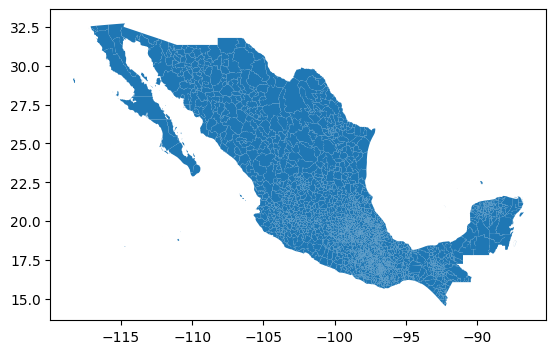

In [29]:
gdf_merged.plot()
plt.show()

In [31]:
df_ecommerce_users.head()

,ENTIDAD,NOM_ENT,MUN,NOM_MUN,ECOMMERCE_USERS,LATITUD,LONGITUD
0,2,Baja California,4,Tijuana,305591.76,"32°31'56.859"" N","117°01'08.088"" W"
1,9,Ciudad de México,7,Iztapalapa,294459.45,"19°21'32.414"" N","99°05'33.441"" W"
2,21,Puebla,114,Puebla,263960.58,"19°02'38.363"" N","98°11'50.981"" W"
3,11,Guanajuato,20,León,258018.68,"21°07'19.099"" N","101°40'59.519"" W"
4,15,México,33,Ecatepec de Morelos,256831.89,"19°35'56.650"" N","99°02'56.971"" W"


In [32]:
df_ecommerce_users['MUN'] = df_ecommerce_users['MUN'].astype(str).str.zfill(3)
df_ecommerce_users['ENTIDAD'] = df_ecommerce_users['ENTIDAD'].astype(str).str.zfill(2)

In [35]:
ecommerce_gdf = gdf_merged.merge(df_ecommerce_users, left_on=['CVE_ENT', 'CVE_MUN'], right_on=['ENTIDAD', 'MUN'])

In [36]:
ecommerce_gdf.to_file('data/ecommerce_users.geojson', driver='GeoJSON')

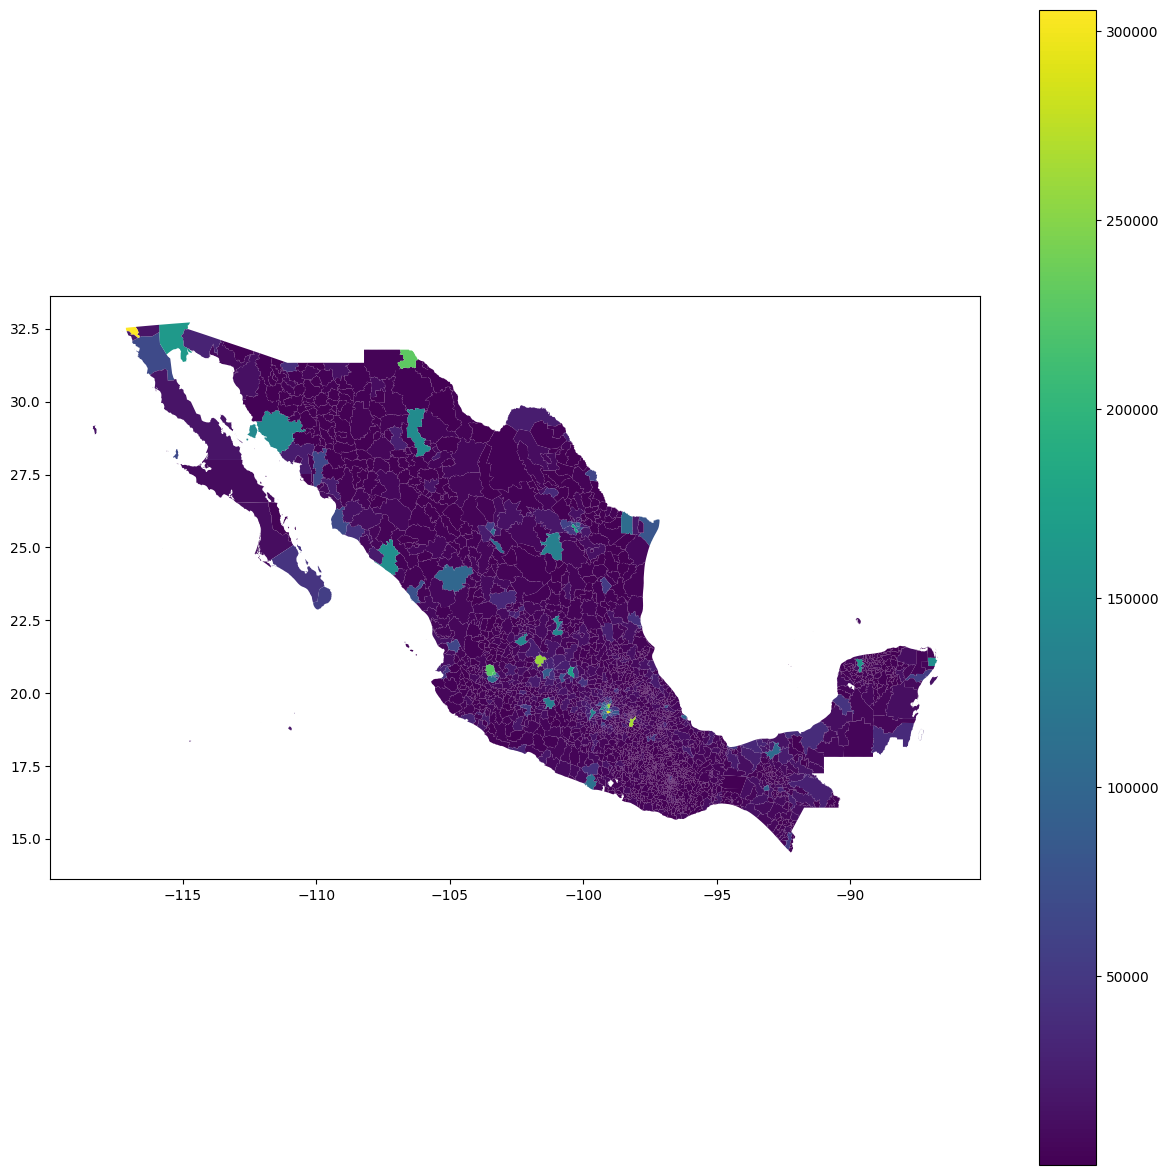

In [37]:
ecommerce_gdf.plot(column='ECOMMERCE_USERS', legend=True, figsize=(15, 15))
plt.show()

In [41]:
ecommerce_gdf.sort_values(by='ECOMMERCE_USERS', ascending=False).head(10)

,CVE_ENT,CVE_MUN,geometry,ENTIDAD,NOM_ENT,MUN,NOM_MUN,ECOMMERCE_USERS,LATITUD,LONGITUD
14,02,004,"MULTIPOLYGON (((-117.24588 32.41361, -117.2457...",02,Baja California,004,Tijuana,305591.76,"32°31'56.859"" N","117°01'08.088"" W"
278,09,007,"POLYGON ((-99.09908 19.32044, -99.09908 19.320...",09,Ciudad de México,007,Iztapalapa,294459.45,"19°21'32.414"" N","99°05'33.441"" W"
1692,21,114,"POLYGON ((-98.27047 18.95136, -98.27068 18.951...",21,Puebla,114,Puebla,263960.58,"19°02'38.363"" N","98°11'50.981"" W"
347,11,020,"POLYGON ((-101.69956 20.99748, -101.70113 20.9...",11,Guanajuato,020,León,258018.68,"21°07'19.099"" N","101°40'59.519"" W"
696,15,033,"POLYGON ((-99.07477 19.50295, -99.0749 19.503,...",15,México,033,Ecatepec de Morelos,256831.89,"19°35'56.650"" N","99°02'56.971"" W"
242,08,037,"POLYGON ((-106.50609 31.17932, -106.50149 31.1...",08,Chihuahua,037,Juárez,229658.07,"31°44'47.275"" N","106°29'06.067"" W"
658,14,120,"POLYGON ((-103.47609 20.59795, -103.47847 20.5...",14,Jalisco,120,Zapopan,226089.51,"20°43'15.463"" N","103°23'20.356"" W"
577,14,039,"POLYGON ((-103.37618 20.6096, -103.37618 20.60...",14,Jalisco,039,Guadalajara,216702.30,"20°40'35.000"" N","103°20'32.000"" W"
276,09,005,"POLYGON ((-99.14941 19.48245, -99.14943 19.482...",09,Ciudad de México,005,Gustavo A. Madero,188528.77,"19°28'58.603"" N","99°06'48.495"" W"
996,19,039,"POLYGON ((-100.38316 25.66982, -100.38332 25.6...",19,Nuevo León,039,Monterrey,177049.16,"25°39'52.910"" N","100°18'39.210"" W"
